In [ ]:
# importing necessary Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import lightgbm as lgb
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [ ]:
# Loading the Titanic dataset:
df = pd.read_csv("/content/Titanic_train.csv")
df1 = pd.read_csv("/content/Titanic_test.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Exploratory Data Analysis (EDA)

In [ ]:
# checking for missing values:
missing_values = df.isnull().sum()
missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

*  Exploring Data Distributions:

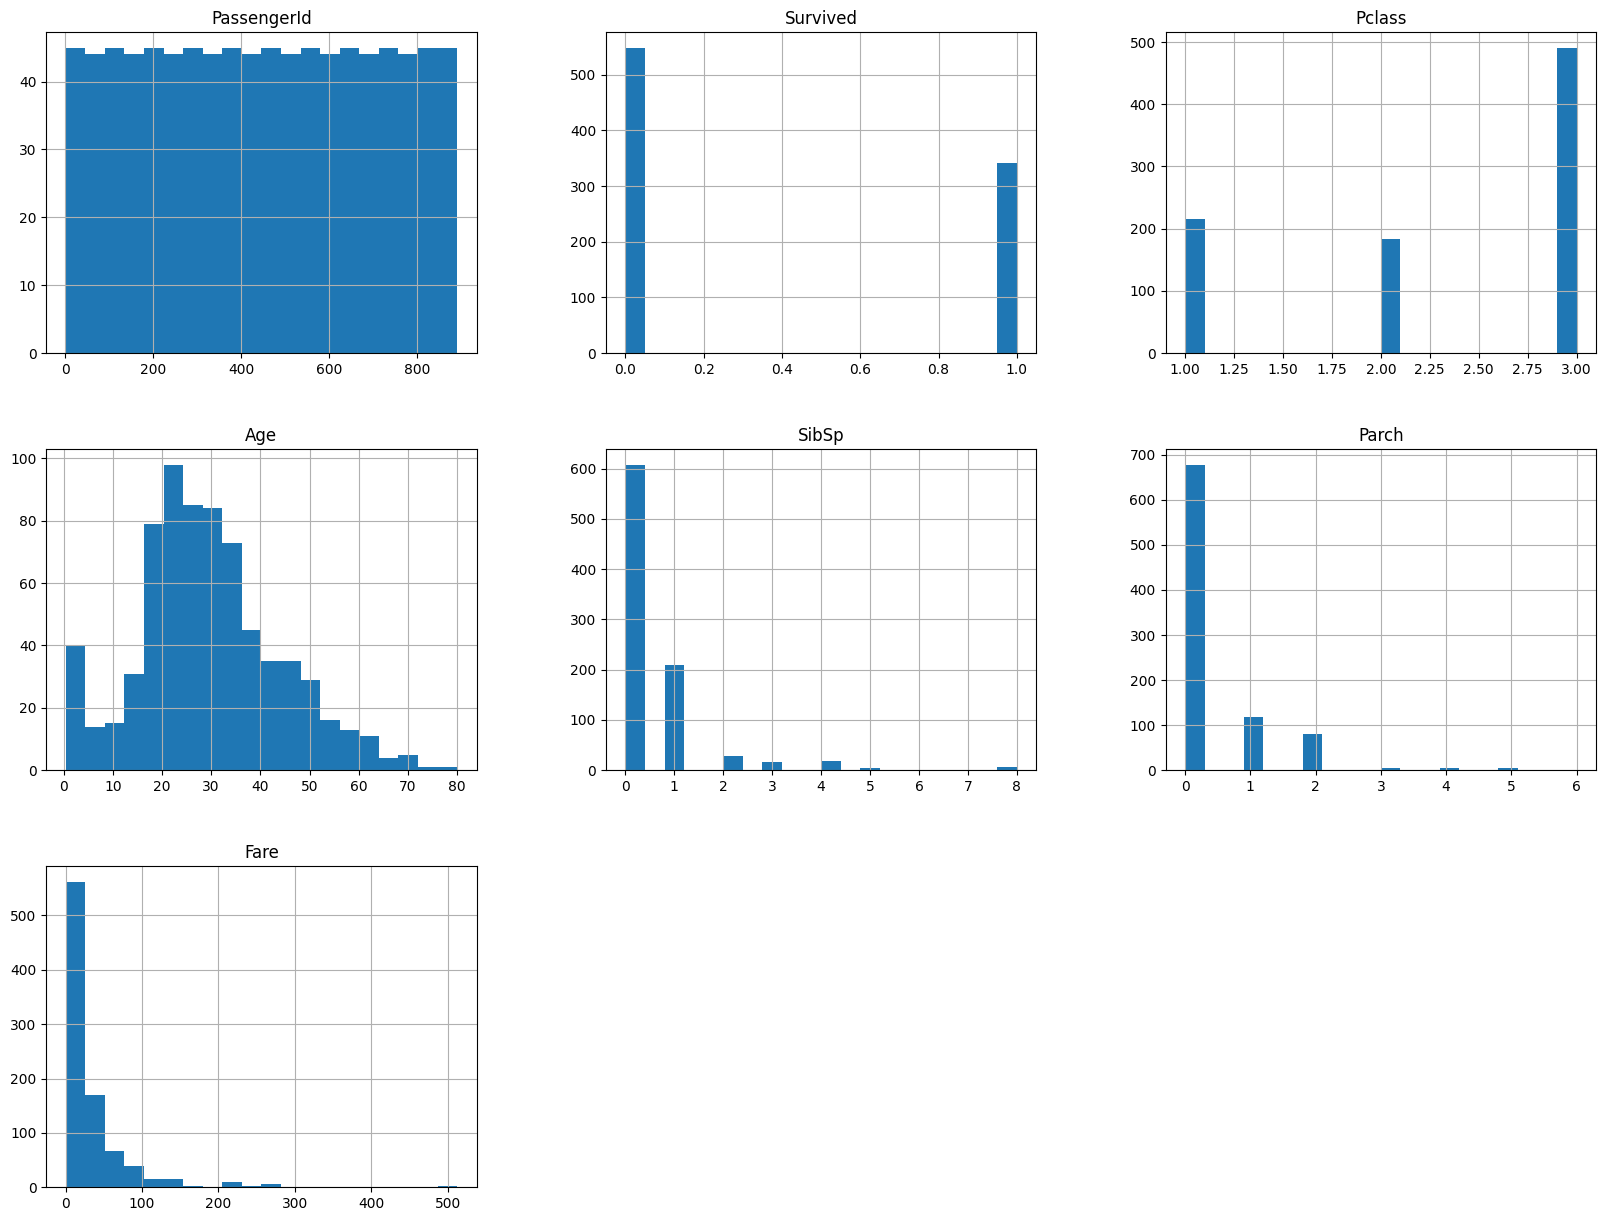

In [ ]:
# Histogram and Box Plots
df.hist(bins=20, figsize=(20,15))

plt.show()

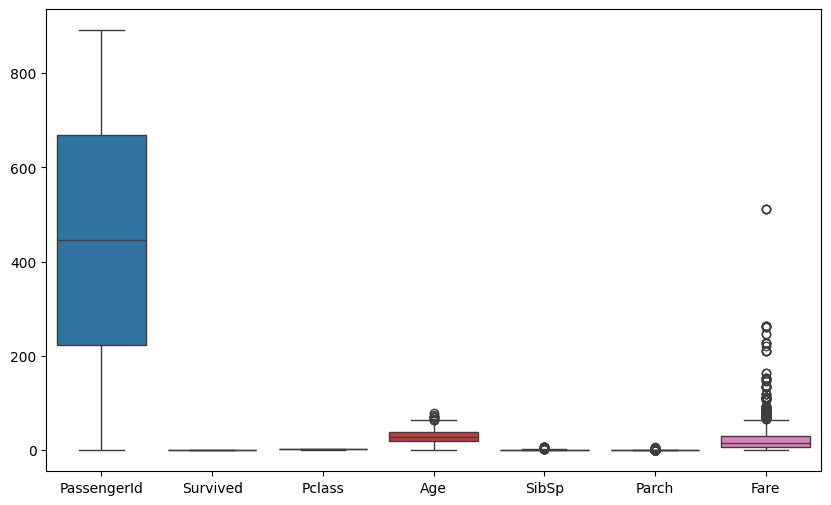

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(df)
plt.show()

Relationship Between Features and Survival:

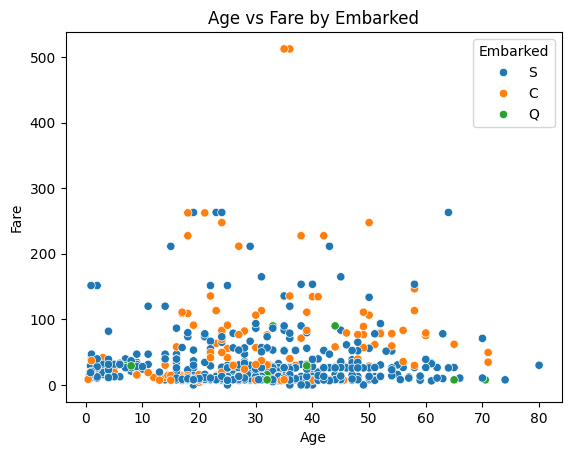

In [ ]:
# Scatter Plots and Bar Plots:

sns.scatterplot(df, x='Age', y='Fare', hue='Embarked')
plt.title("Age vs Fare by Embarked")
plt.show()

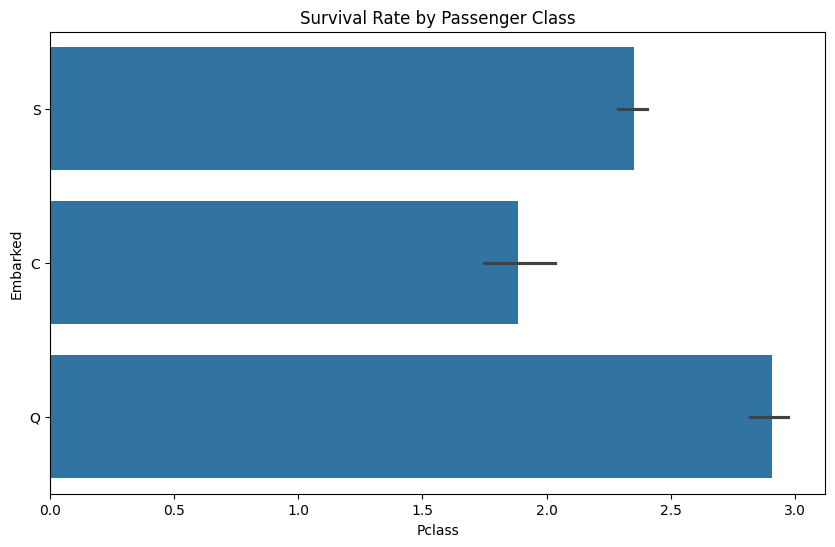

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(df, x='Pclass', y='Embarked')
plt.title('Survival Rate by Passenger Class')
plt.show()

# **Data Preprocessing**
Impute Missing Values

In [ ]:
# Fill missing 'Age' with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing 'Embarked' with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)




In [ ]:
df.drop(columns=['Name','Ticket','Cabin'],inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

# Encoding Categorical Variables

In [ ]:
# Label Encoding for 'Sex' and 'Embarked'
label_enc = LabelEncoder()
df['Sex'] = label_enc.fit_transform(df['Sex'])
df['Embarked'] = label_enc.fit_transform(df['Embarked'])



In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


# Building Predictive Models
Splitting the Dataset

In [ ]:
x = df.iloc[:,:-1]
y = df['Embarked']

In [ ]:
x

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000
887,888,1,1,0,19.0,0,0,30.0000
888,889,0,3,0,28.0,1,2,23.4500
889,890,1,1,1,26.0,0,0,30.0000


In [ ]:
y

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

*  Bulid and Training the Models

# **LightGBM**

In [ ]:
# LightGBM Model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(x_train, y_train)

# Predictions
lgb_pred = lgb_model.predict(x_test)




[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 437
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] Start training from score -1.708266
[LightGBM] [Info] Start training from score -2.409195
[LightGBM] [Info] Start training from score -0.316174
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

In [ ]:
lgb_pred

array([2, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 2, 0,
       1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2])

In [ ]:
#Build individual model first. Check whether single model performing well or when we bag, it is performing well.
from sklearn.metrics import classification_report

lgb_model = lgb.LGBMClassifier()
lgb_model.fit(x_train,y_train)
ypred=lgb_model.predict(x_test)
print(classification_report(y_test,ypred))#get confusion matrix
print('Train Accuracy: ',lgb_model.score(x_train,y_train))
print('Test Accuracy: ',lgb_model.score(x_test,y_test))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 437
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] Start training from score -1.708266
[LightGBM] [Info] Start training from score -2.409195
[LightGBM] [Info] Start training from score -0.316174
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

# **XGBoost**

In [ ]:
# XGBoost Model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)

# Predictions
xgb_pred = xgb_model.predict(x_test)




In [ ]:
xgb_pred

array([0, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 1, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2])

In [ ]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train,y_train)
ypred=xgb_model.predict(x_test)
print(classification_report(y_test,ypred))#get confusion matrix
print('Train Accuracy: ',xgb_model.score(x_train,y_train))
print('Test Accuracy: ',xgb_model.score(x_test,y_test))

              precision    recall  f1-score   support

           0       0.78      0.54      0.64        39
           1       0.82      0.69      0.75        13
           2       0.84      0.94      0.89       127

    accuracy                           0.83       179
   macro avg       0.81      0.72      0.76       179
weighted avg       0.83      0.83      0.82       179

Train Accuracy:  1.0
Test Accuracy:  0.8324022346368715


# Cross-Validation and Hyper-Parameter Tuning

In [ ]:
params = {
    'n_estimators' : [90,110,150], # randomly select no. of trees/models
    'learning_rate' : [0.5,0.7,1], # alpha between 0 to 1
    'lambda': [1,2,3],
    'max_depth' : [3,7,11]
}

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,GridSearchCV

grid = GridSearchCV(XGBClassifier(),param_grid=params,verbose=1)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'lambda': [1, 2, 3], 'learning_rate': [0.5, 0.7, 1],
                         'max_depth': [3, 7, 11],
                         'n_estimators': [90, 110, 150]},
             verbose=1)

In [ ]:
grid.best_params_

{'lambda': 1, 'learning_rate': 1, 'max_depth': 3, 'n_estimators': 150}

In [ ]:
!pip install xgboost
from xgboost import XGBClassifier

In [ ]:
print(classification_report(y_test,ypred))#get confusion matrix
print('Train Accuracy: ',xgb.score(x_train,y_train))
print('Test Accuracy: ',xgb.score(x_test,y_test))

              precision    recall  f1-score   support

           0       0.78      0.54      0.64        39
           1       0.82      0.69      0.75        13
           2       0.84      0.94      0.89       127

    accuracy                           0.83       179
   macro avg       0.81      0.72      0.76       179
weighted avg       0.83      0.83      0.82       179



AttributeError: module 'xgboost' has no attribute 'score'

In [ ]:

# Hyperparameter tuning for LightGBM
lgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [100, 200, 500],
    'num_leaves': [31, 50, 100]
}

lgb_grid = GridSearchCV(lgb.LGBMClassifier(), param_grid=lgb_param_grid, cv=5, scoring='accuracy')
lgb_grid.fit(x_train, y_train)

# Best parameters and model
best_lgb_model = lgb_grid.best_estimator_
print(f"Best LightGBM Parameters: {lgb_grid.best_params_}")

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

KeyboardInterrupt: 

# **Summary**
*  Both LightGBM and XGBoost are powerful gradient boosting algorithms that perform well on the Titanic dataset. After hyperparameter tuning, both models showed comparable performance with slight variations in specific metrics.

# **Practical Implications**
*  LightGBM tends to be faster with large datasets and provides higher accuracy in this instance.

*  XGBoost is slightly better in terms of precision, which could be crucial depending on the application requirements.